(line-continuum-doc)=
# Line continuum

By default, $\mathrm{LiMe}$ computes a line continuum using the central band edges (w3 and w4 in the image below).

<img src="../0_resources/images/bands_definition.png" width="1200" />

In cases where you need to analyze a large amount of data, this IRAF-like approach provides good results with minimal user input. However, depending on the line properties, it may not always be the most suitable solution.

In this tutorial, we will explore the three options currently available in $\mathrm{LiMe}$: ``central``, ``adjacent``, and ``fit``.

<div class="alert alert-warning">

**Please note:** In $\mathrm{LiMe\_v1}$, the line continuum could only be fitted using the **adjacent** continuum bands.  
To reproduce those results in the current version, use ``count_source='adjacent'`` in your ``.fit()`` functions.
</div>

## Central band continuum

Let's start by loading a spectrum:

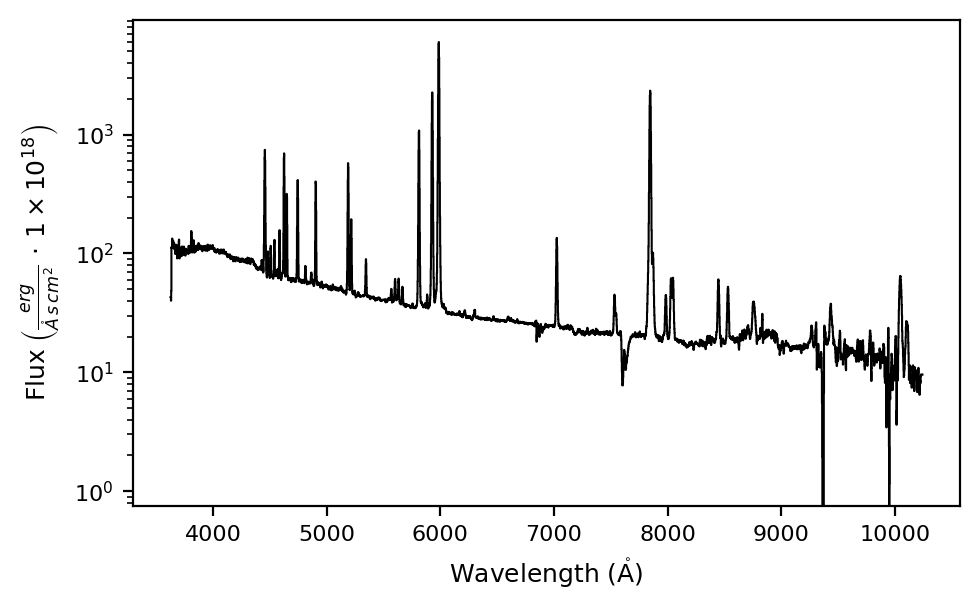

In [2]:
import numpy as np
from astropy.io import fits
from pathlib import Path
import lime

# State the input files
obsFitsFile = '../0_resources/spectra/gp121903_osiris.fits'
lineBandsFile = '../0_resources/bands/gp121903_bands.txt'
cfgFile = '../0_resources/long_slit.toml'

# Spectrum parameters
z_obj = 0.19531
norm_flux = 1e-18

# Create the observation object
gp_spec = lime.Spectrum.from_file(obsFitsFile, instrument='osiris', redshift=z_obj, norm_flux=norm_flux)
gp_spec.plot.spectrum(log_scale=True)

As mentioned previously, the default option is to fit the continuum using the limits of the central bands:

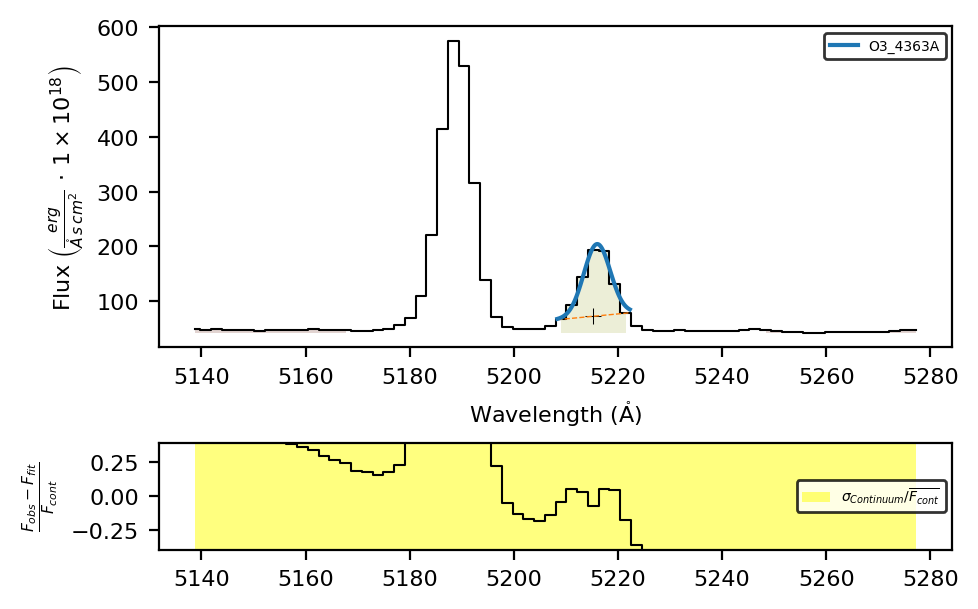

In [3]:
gp_spec.fit.bands('O3_4363A')
gp_spec.plot.bands()

However, if you do not provide a set of line bands tailored to your object's resolution, the central bands may not fully cover the emission line:

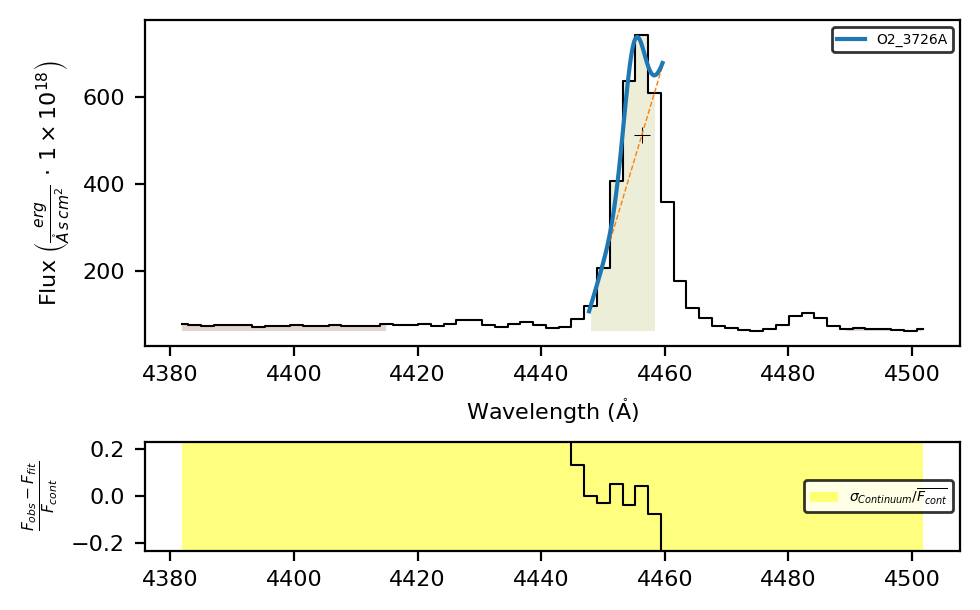

In [4]:
gp_spec.fit.bands('O2_3726A')
gp_spec.plot.bands()

It is strongly recommended, regardless of the line continuum method you use, to adjust and prepare your line bands according to your observations, as shown in {ref}`the previous tutorials <prepare-line-bands-doc>`.

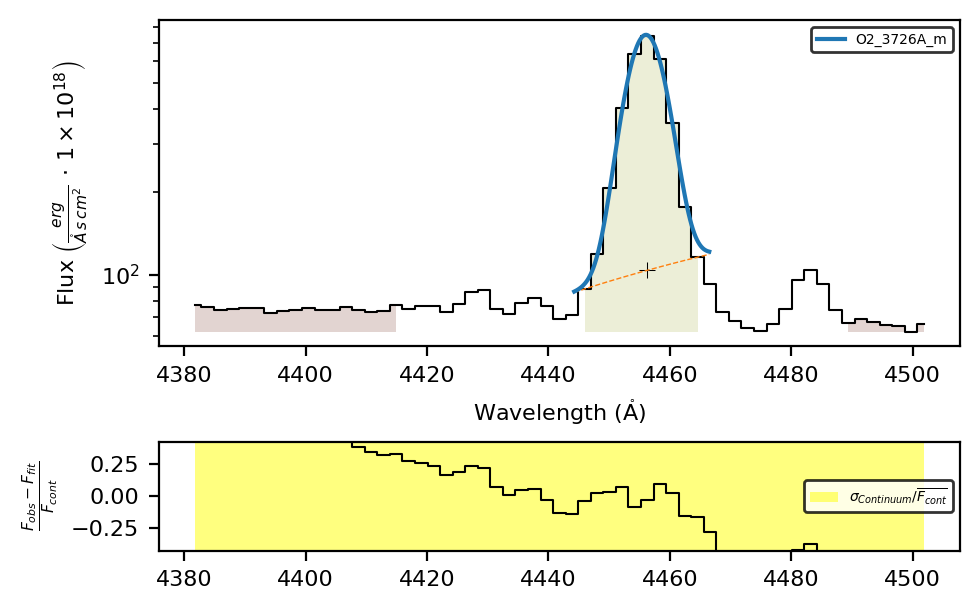

In [5]:
gp_spec.fit.bands('O2_3726A_m', lineBandsFile, cfgFile)
gp_spec.plot.bands(y_scale='log')

## Adjacent bands continua

The second option is to use the adjacent continuum bands to determine the continuum level. This is done by setting ``cont_source='adjacent'``:

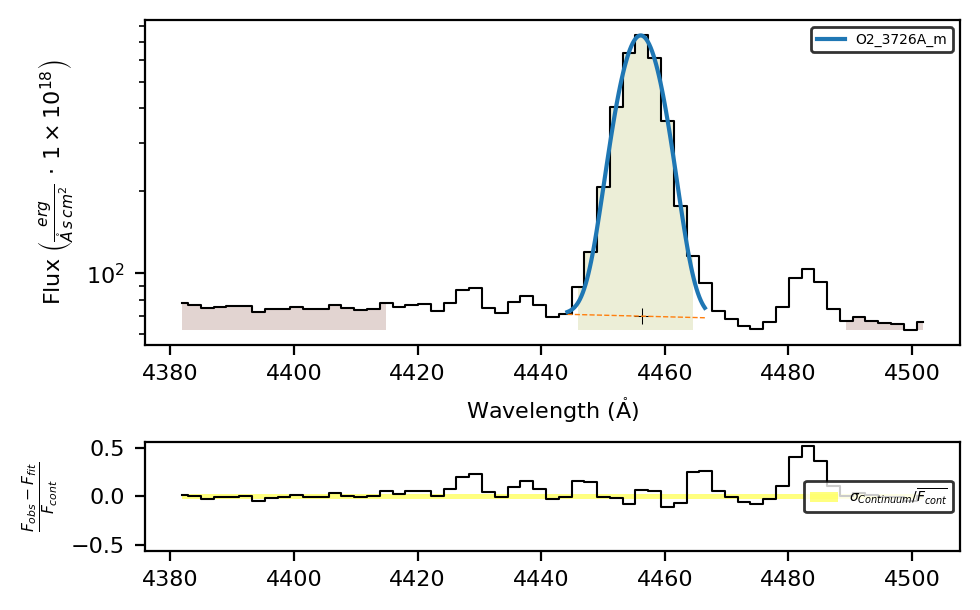

In [6]:
gp_spec.fit.bands('O2_3726A_m', lineBandsFile, cfgFile, cont_source='adjacent')
gp_spec.plot.bands(y_scale='log')

In this case, it provided a better fit. However, you must ensure that, for every line, the adjacent bands cover {ref}`a representative baseline for their continuum <manual-bands-adjustement-doc>`.

## Fitted continuum

In a {ref}`previous tutorial <continuum-fitting-doc>`, we fitted a polynomial to the observation. We can use this as the baseline for the line continua:

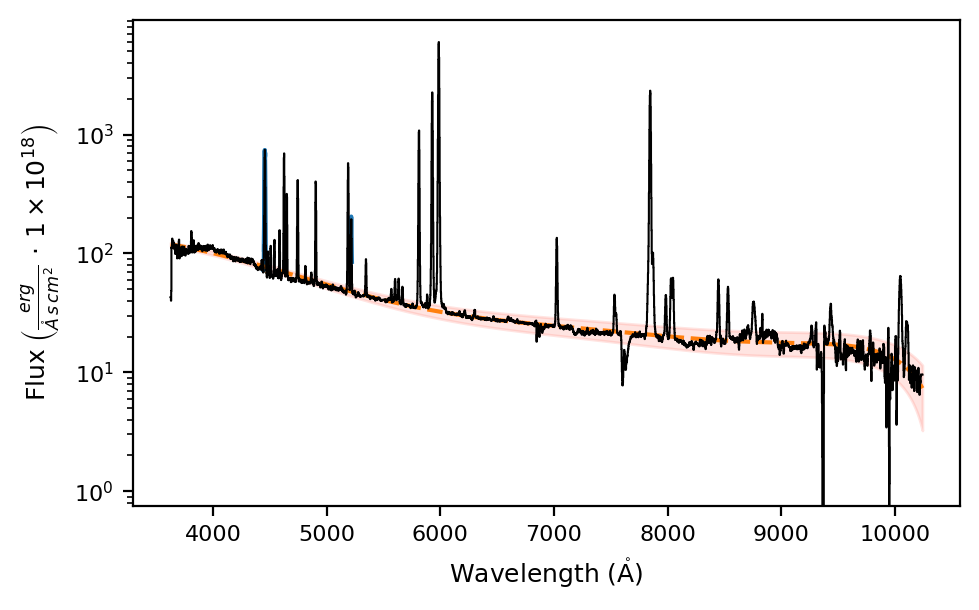

In [7]:
gp_spec.fit.continuum(degree_list=[3, 6, 6], emis_threshold=[3, 2, 1.5])
gp_spec.plot.spectrum(log_scale=True, show_cont=True)

by setting ``cont_source='fit'``:

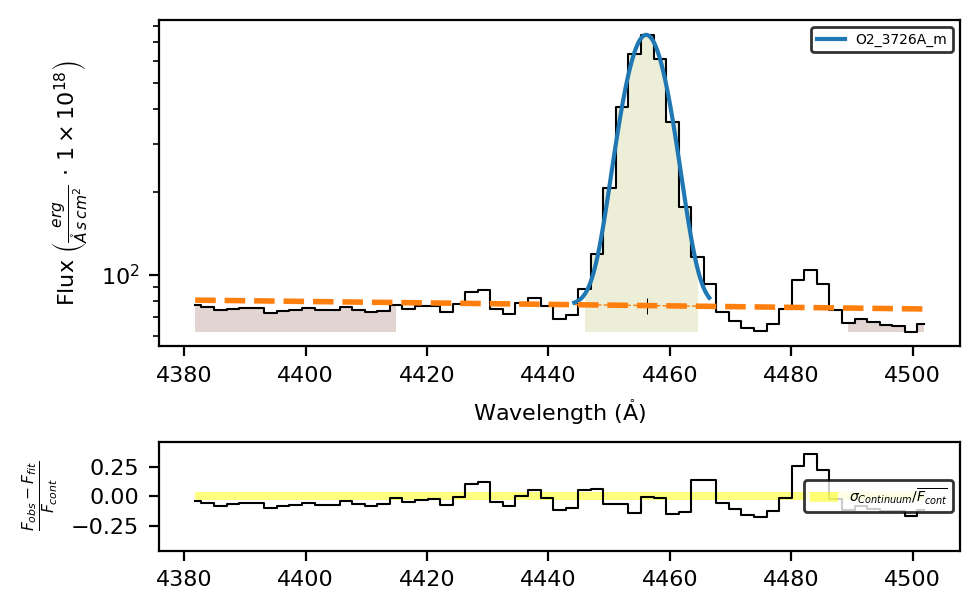

In [8]:
gp_spec.fit.bands('O2_3726A_m', lineBandsFile, cfgFile, cont_source='fit')
gp_spec.plot.bands(y_scale='log', show_cont=True)

In this case, you can see that the small black cross, which represents the line ``cont`` value in the measurements table at ``peak_wave``, matches the object continuum — displayed here using ``show_cont=True``.

<div class="alert alert-warning">

**Please note:** Although $\mathrm{LiMe}$ uses the fitted continuum for the entire **(w3, w4)** region, it only saves the continuum level at the line’s peak wavelength.  
Subsequent plots compute a linear continuum between **w3** and **w4** to define the baseline.  
As a result, the plotted profiles might not perfectly represent the measured ones.  

As a qualitative check, you can verify that the black cross lies within the **w3–w4** continuum (the thin dashed orange line).
</div>
